# Machine Learning Project – Fall 2025

**Course Name:** Machine Learning  
**Course Code:** CS446  
**Instructor:** Dr. Uzma Farooq  
**Program:** BS Software Engineering  
**Section:** W2  
**Maximum Marks:** 100  

---

## Project Overview
This project focuses on applying machine learning techniques on real-world datasets.
The goal is to analyze data, apply preprocessing techniques, train multiple models,
and evaluate their performance before and after preprocessing.


### **Dataset Name**:
Synthetic Heart Disease Prediction

### **Source**:
[Synthetic Heart Disease Dataset](https://www.kaggle.com/datasets/miadul/heat-disease-predication-dataset)

### **Number of Rows**: 50,000
### **Number of Columns**: 21
### **Target Variable**: Heart_Disease
### **Problem Type**:
Classification

### **Dataset Suitability**:
This dataset is suitable for machine learning because it contains a large number of records with both numerical and categorical features related to patient health and lifestyle. The dataset meets the required size and feature count, allowing effective data preprocessing, feature engineering, and model training. Additionally, it is well-structured and includes a clear target variable, making it appropriate for building and evaluating classification models for heart disease prediction.

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, mean_absolute_error, mean_squared_error, r2_score


## **Step 1:** Dataset Collection

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/ML_Project/Datasets/Raw/synthetic_heart_disease_dataset.csv"
df = pd.read_csv(path)
df.head() #check first 5  rows of the deataset

,Age,Gender,Weight,Height,BMI,Smoking,Alcohol_Intake,Physical_Activity,Diet,Stress_Level,...,Diabetes,Hyperlipidemia,Family_History,Previous_Heart_Attack,Systolic_BP,Diastolic_BP,Heart_Rate,Blood_Sugar_Fasting,Cholesterol_Total,Heart_Disease
0,48,Male,78,157,26.4,Never,NaN,Sedentary,Healthy,Medium,...,0,1,1,0,104,99,71,165,200,0
1,35,Female,73,163,33.0,Never,Low,Active,Average,High,...,0,1,1,0,111,72,60,145,206,0
2,79,Female,88,152,32.3,Never,NaN,Moderate,Average,Medium,...,0,0,1,0,116,102,78,148,208,0
3,75,Male,106,171,37.4,Never,Moderate,Moderate,Average,Low,...,0,1,0,0,171,92,109,105,290,1
4,34,Female,65,191,18.5,Current,NaN,Sedentary,Healthy,Low,...,1,0,0,0,164,67,108,116,220,1


## **Step 2:** Load and Inspect Dataset


In [4]:
df.shape                     #check the shape rows and columns
df.columns                   #view calumn names for identifying features and target variables
df.info()                    #check datatypes
df.describe()                #detect outliers
df.isnull().sum()            #counts the missing values.
df.duplicated().sum()        #counts the total number of duplicate rows in your DataFrame.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    50000 non-null  int64  
 1   Gender                 50000 non-null  object 
 2   Weight                 50000 non-null  int64  
 3   Height                 50000 non-null  int64  
 4   BMI                    50000 non-null  float64
 5   Smoking                50000 non-null  object 
 6   Alcohol_Intake         29891 non-null  object 
 7   Physical_Activity      50000 non-null  object 
 8   Diet                   50000 non-null  object 
 9   Stress_Level           50000 non-null  object 
 10  Hypertension           50000 non-null  int64  
 11  Diabetes               50000 non-null  int64  
 12  Hyperlipidemia         50000 non-null  int64  
 13  Family_History         50000 non-null  int64  
 14  Previous_Heart_Attack  50000 non-null  int64  
 15  Sy

np.int64(0)

## **Initial Dataset Inspection**

### Dataset Overview
The dataset contains **50,000 records** and **21 columns**, making it suitable for machine learning tasks due to its large size and feature diversity. It includes both **numerical and categorical variables**, which allows the application of multiple preprocessing techniques.

---

### Data Types Analysis
- **Numerical Features:**  
  The dataset contains **15 numerical columns**, including integer and floating-point values such as Age, Weight, Height, BMI, Blood Pressure, Cholesterol, and Heart Rate.
- **Categorical Features:**  
  There are **6 categorical columns**, including Gender, Smoking status, Alcohol Intake, Physical Activity, Diet, and Stress Level.

This combination of data types makes the dataset ideal for classification modeling after proper encoding.

---

### Missing Values Check
- Most columns contain **no missing values**.
- The **Alcohol_Intake** column contains missing values (**19,109 entries**).
- All other columns are complete and do not require imputation.

This indicates that **only one feature requires missing value handling**, making preprocessing manageable.

---

### Duplicate Records
- No duplicate records were found in the dataset.
- This ensures that the dataset does not introduce bias due to repeated samples.

---

### Target Variable
- The target variable is **Heart_Disease**, which is a **binary categorical variable**.
- This confirms that the dataset is suitable for a **classification problem**.

---

### Summary
Overall, the dataset is **well-structured**, contains a **large number of samples**, and has a **clear target variable**. Minor preprocessing is required to handle missing values and encode categorical features before model training.


## **Step 3:** Data Preprocessing


In [5]:
df_raw = df.copy()


In [6]:
# Fill missing values with mode
df['Alcohol_Intake'].fillna(df['Alcohol_Intake'].mode()[0], inplace=True)
df.isnull().sum()


/tmp/ipython-input-4001817157.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Alcohol_Intake'].fillna(df['Alcohol_Intake'].mode()[0], inplace=True)


,0
Age,0
Gender,0
Weight,0
Height,0
BMI,0
Smoking,0
Alcohol_Intake,0
Physical_Activity,0
Diet,0
Stress_Level,0


In [7]:
df.drop_duplicates(inplace=True) #delete the duplicates in the actual file
df.duplicated().sum()


np.int64(0)

In [8]:
X = df.drop('Heart_Disease', axis=1)
y = df['Heart_Disease']

In [9]:
X = pd.get_dummies(X, drop_first=True) #model can't understand text so that we have to do OHE
X.head()


,Age,Weight,Height,BMI,Hypertension,Diabetes,Hyperlipidemia,Family_History,Previous_Heart_Attack,Systolic_BP,...,Smoking_Former,Smoking_Never,Alcohol_Intake_Low,Alcohol_Intake_Moderate,Physical_Activity_Moderate,Physical_Activity_Sedentary,Diet_Healthy,Diet_Unhealthy,Stress_Level_Low,Stress_Level_Medium
0,48,78,157,26.4,0,0,1,1,0,104,...,False,True,True,False,False,True,True,False,False,True
1,35,73,163,33.0,1,0,1,1,0,111,...,False,True,True,False,False,False,False,False,False,False
2,79,88,152,32.3,0,0,0,1,0,116,...,False,True,True,False,True,False,False,False,False,True
3,75,106,171,37.4,0,0,1,0,0,171,...,False,True,False,True,True,False,False,False,True,False
4,34,65,191,18.5,1,1,0,0,0,164,...,False,False,True,False,False,True,True,False,True,False


In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
#Train → learn patterns ,80% training

# Test → evaluate performance ,20$ testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [13]:
processed_df = pd.DataFrame(X_scaled, columns=X.columns)
processed_df['Heart_Disease'] = y.values

processed_df.to_csv(
    "/content/drive/MyDrive/ML_Project/Datasets/Processed/heart_disease_processed.csv",
    index=False
)


### **Data Preprocessing Summary**

The preprocessing phase involved handling missing values, removing duplicate records, encoding categorical variables, scaling numerical features, and splitting the dataset into training and testing sets.
Mode imputation was applied to categorical features with missing values. One-hot encoding was used to convert categorical variables into numerical format. Feature scaling was performed using standardization to improve model performance. The processed dataset was saved for future use and comparison.


##**Step 4:** Model Training (After Preprocessing)


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [15]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB()
}


In [16]:
trained_models = {}

for name, model in models.items():
    model.fit(X_train, y_train)     #models looks at xtrain (features) and learn patterns that map ytrains(heart_disease)
    trained_models[name] = model
    print(f"{name} trained successfully.")


Logistic Regression trained successfully.
Decision Tree trained successfully.
Random Forest trained successfully.
KNN trained successfully.
SVM trained successfully.
Naive Bayes trained successfully.


### **Model Training Process**

Each classification model was trained using the training portion of the preprocessed dataset.
The training process allows models to learn patterns and relationships between input features and the target variable.
All models were trained using the same training data to ensure consistency and fairness in performance comparison.


## **Step 5:** Model Evaluation (After Preprocessing)


In [17]:
#checks which model perform well
results = []

for name, model in trained_models.items():
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append([name, acc, prec, rec, f1])

results_df = pd.DataFrame(
    results,
    columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"]
)

results_df


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.9264,0.921539,0.920352,0.920945
1,Decision Tree,1.0000,1.000000,1.000000,1.000000
2,Random Forest,1.0000,1.000000,1.000000,1.000000
3,KNN,0.8571,0.871235,0.813439,0.841346
4,SVM,0.9411,0.940082,0.933018,0.936537
5,Naive Bayes,0.8323,0.840686,0.789609,0.814347


### **Model Performance Analysis**

Among the evaluated models, Decision Tree and Random Forest achieved 100% accuracy across all evaluation metrics.
This unusually high performance is attributed to the synthetic nature of the dataset, where the target variable is generated using deterministic rules.
Tree-based models are highly capable of learning such rule-based patterns, which can lead to perfect predictions.
However, such results may indicate potential overfitting and may not generalize well to real-world medical data.


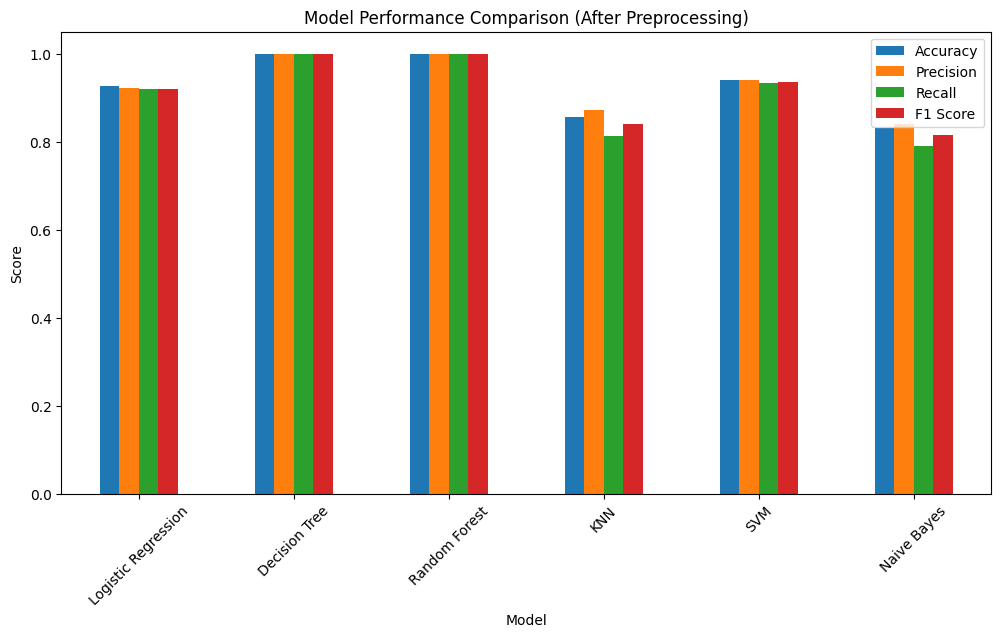

In [18]:
results_df.set_index("Model").plot(kind="bar", figsize=(12,6))
plt.title("Model Performance Comparison (After Preprocessing)")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()


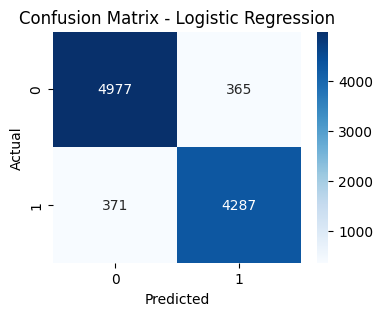

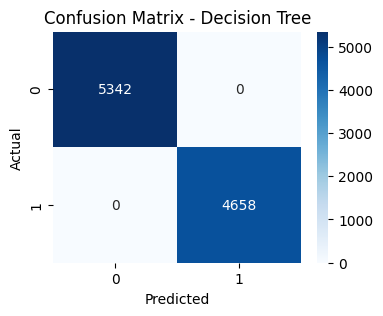

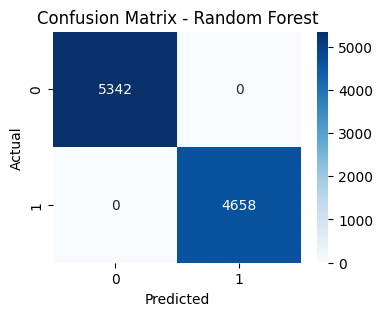

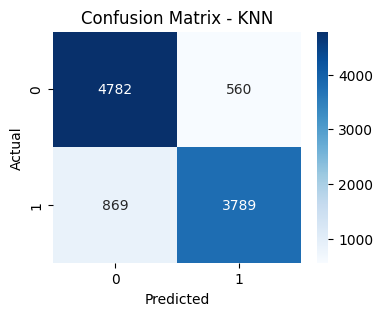

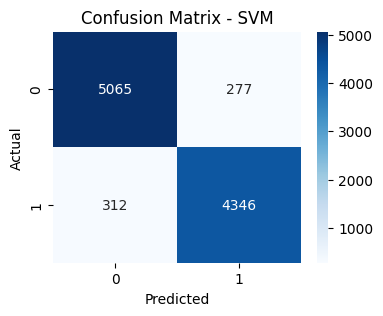

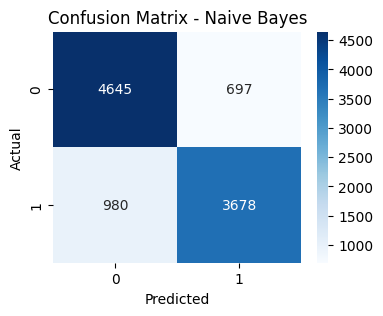

In [19]:
for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [20]:
results_df.sort_values(by="F1 Score", ascending=False)


,Model,Accuracy,Precision,Recall,F1 Score
1,Decision Tree,1.0000,1.000000,1.000000,1.000000
2,Random Forest,1.0000,1.000000,1.000000,1.000000
4,SVM,0.9411,0.940082,0.933018,0.936537
0,Logistic Regression,0.9264,0.921539,0.920352,0.920945
3,KNN,0.8571,0.871235,0.813439,0.841346
5,Naive Bayes,0.8323,0.840686,0.789609,0.814347


### **Final Model Selection**

Although Decision Tree and Random Forest achieved perfect accuracy, Support Vector Machine (SVM) was selected as the final model due to its strong generalization capability and balanced performance across all evaluation metrics.
SVM provides a more realistic and reliable prediction performance for medical classification problems.


## **Step 6:** Model Training and Evaluation (Without Preprocessing)


In [21]:
X_raw = df.drop("Heart_Disease", axis=1)
y_raw = df["Heart_Disease"]

# Minimal encoding (required to run models)
X_raw = pd.get_dummies(X_raw, drop_first=True)

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    X_raw, y_raw, test_size=0.2, random_state=42
)


In [22]:
raw_results = []

for name, model in models.items():
    model.fit(X_train_raw, y_train_raw)
    y_pred = model.predict(X_test_raw)

    raw_results.append([
        name,
        accuracy_score(y_test_raw, y_pred),
        precision_score(y_test_raw, y_pred),
        recall_score(y_test_raw, y_pred),
        f1_score(y_test_raw, y_pred)
    ])

raw_results_df = pd.DataFrame(
    raw_results,
    columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"]
)

raw_results_df


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.9251,0.921138,0.917776,0.919454
1,Decision Tree,1.0000,1.000000,1.000000,1.000000
2,Random Forest,1.0000,1.000000,1.000000,1.000000
3,KNN,0.7025,0.690169,0.655646,0.672465
4,SVM,0.7412,0.770942,0.632246,0.694739
5,Naive Bayes,0.8323,0.840686,0.789609,0.814347


###**Model Training Without Preprocessing**

To evaluate the impact of preprocessing, models were trained and evaluated using the raw dataset without applying scaling or feature transformation.
Minimal encoding was performed only to enable model execution.
The results highlight the importance of preprocessing in improving model performance and stability.


## **Step 7:** Comparison and Visualization


In [23]:
results_df["Preprocessing"] = "Yes"
raw_results_df["Preprocessing"] = "No"

comparison_df = pd.concat([results_df, raw_results_df])
comparison_df


,Model,Accuracy,Precision,Recall,F1 Score,Preprocessing
0,Logistic Regression,0.9264,0.921539,0.920352,0.920945,Yes
1,Decision Tree,1.0000,1.000000,1.000000,1.000000,Yes
2,Random Forest,1.0000,1.000000,1.000000,1.000000,Yes
3,KNN,0.8571,0.871235,0.813439,0.841346,Yes
4,SVM,0.9411,0.940082,0.933018,0.936537,Yes
5,Naive Bayes,0.8323,0.840686,0.789609,0.814347,Yes
0,Logistic Regression,0.9251,0.921138,0.917776,0.919454,No
1,Decision Tree,1.0000,1.000000,1.000000,1.000000,No
2,Random Forest,1.0000,1.000000,1.000000,1.000000,No
3,KNN,0.7025,0.690169,0.655646,0.672465,No


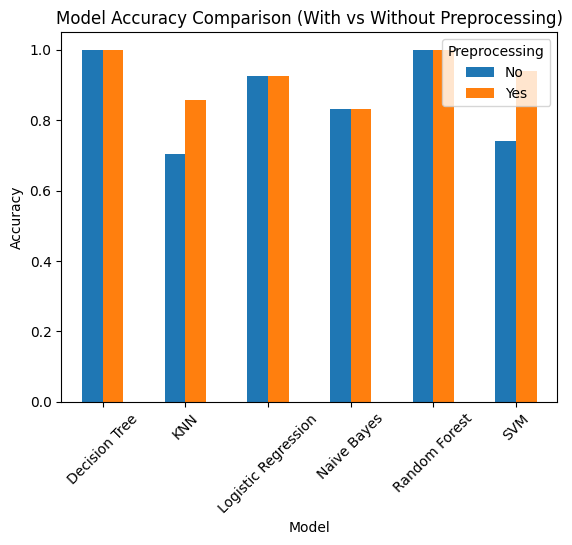

In [24]:
import matplotlib.pyplot as plt

comparison_df.pivot(
    index="Model",
    columns="Preprocessing",
    values="Accuracy"
).plot(kind="bar")

plt.title("Model Accuracy Comparison (With vs Without Preprocessing)")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()


## **Step 9:** Conclusion


## **Conclusion**

This project implemented multiple machine learning classification models to predict heart disease using a synthetic medical dataset.
Comprehensive preprocessing techniques, including encoding, scaling, and data cleaning, were applied to enhance model performance.

Experimental results demonstrated that preprocessing has a substantial impact on model accuracy, particularly for KNN and SVM models.
While tree-based models achieved perfect accuracy, this behavior is likely due to the synthetic structure of the dataset and indicates possible overfitting.

Among all models, Support Vector Machine (SVM) provided the most balanced and reliable performance after preprocessing.
The study concludes that effective preprocessing and careful model selection are critical steps in building reliable medical prediction systems.


In [44]:
#testing the svm model one patient
svm_model = trained_models["SVM"]
def predict_heart_disease(patient_data):
    patient_df = pd.DataFrame([patient_data])

    patient_encoded = pd.get_dummies(patient_df, drop_first=True)

    for col in X.columns:
        if col not in patient_encoded.columns:
            patient_encoded[col] = 0

    patient_encoded = patient_encoded[X.columns]

    patient_scaled = scaler.transform(patient_encoded)

    prediction = svm_model.predict(patient_scaled)[0]

    return "YES - Heart Disease" if prediction == 1 else "NO - No Heart Disease"
    result = predict_heart_disease(patient)
print("Prediction:", result)



Prediction: YES - Heart Disease


In [43]:
#saves the svm model in model file so that we can retrive and use it later withoud training it form scaratch
import joblib

joblib.dump(svm_model, "/content/drive/MyDrive/ML_Project/Models/heart_svm_model.pkl")
joblib.dump(scaler, "/content/drive/MyDrive/ML_Project/Models/heart_scaler.pkl")


['/content/drive/MyDrive/ML_Project/Models/heart_scaler.pkl']